# Adult Income Census

## -----------------------------------------------------------------------------------------------------------------------------

# Objective of this project:
The goal of this machine learning project is to predict whether a person makes over 50K a year or not given their demographic variation, and which model provides the best accuracy.    

## -----------------------------------------------------------------------------------------------------------------------------

# Data description:
This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker. The prediction task is to determine whether a person makes over $50K a year.

## -----------------------------------------------------------------------------------------------------------------------------

# Features Description: 

### - Independent Variables:###

1) Continuous Attributes -

Age:               continuous.  - Age of an individual

Fnlwgt:            continuous.  - final weight, prepared monthly by Population Division at the Census Bureau.

Educational-num:   continuous.  - Individual's highest education degree
 
Hours-per-week:    continuous.  - Individual's working hour per week

Capital-gain:      continuous.  

Capital-loss:      continuous. 

2) Categorical Attributes - 

Workclass:       Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
                 - Individual work category
                 
Education:       Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-                  4th, 10th, Doctorate, 5th-6th, Preschool.
                 - Individual's highest education degree


Marital-status:  Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF- spouse.
                 - Individual marital status
                 
Occupation:      Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-                  op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed- Forces.
                 - Individual's occupation
                 
Relationship:    Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
                 - Individual's relation in a family
                 
Race:            White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
                 - Race of Individual
                 
Sex:             Female, Male.
                 
Native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,                       Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,                     Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua,                     Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
                - Individual's native country

### - Dependent Variable:###

Income : <=50K and >50K

## -----------------------------------------------------------------------------------------------------------------------------

## Import packages: ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score, train_test_split
from scipy import stats

l={}

## Import data:

In [2]:
df = pd.read_csv('adult.csv')

#Renaming the incorrectly spelled columns
df = df.rename({'captial_gain':'capital_gain','captial_loss':'capital_loss', 'gender':'sex'}, axis=1)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


## 1. Exploratory data analysis:

In [3]:
#Looking at how our data looks
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
age                48842 non-null int64
workclass          48842 non-null object
fnlwgt             48842 non-null int64
education          48842 non-null object
educational-num    48842 non-null int64
marital-status     48842 non-null object
occupation         48842 non-null object
relationship       48842 non-null object
race               48842 non-null object
sex                48842 non-null object
capital-gain       48842 non-null int64
capital-loss       48842 non-null int64
hours-per-week     48842 non-null int64
native-country     48842 non-null object
income             48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
#Checking the shape of our dataset
df.shape


(48842, 15)

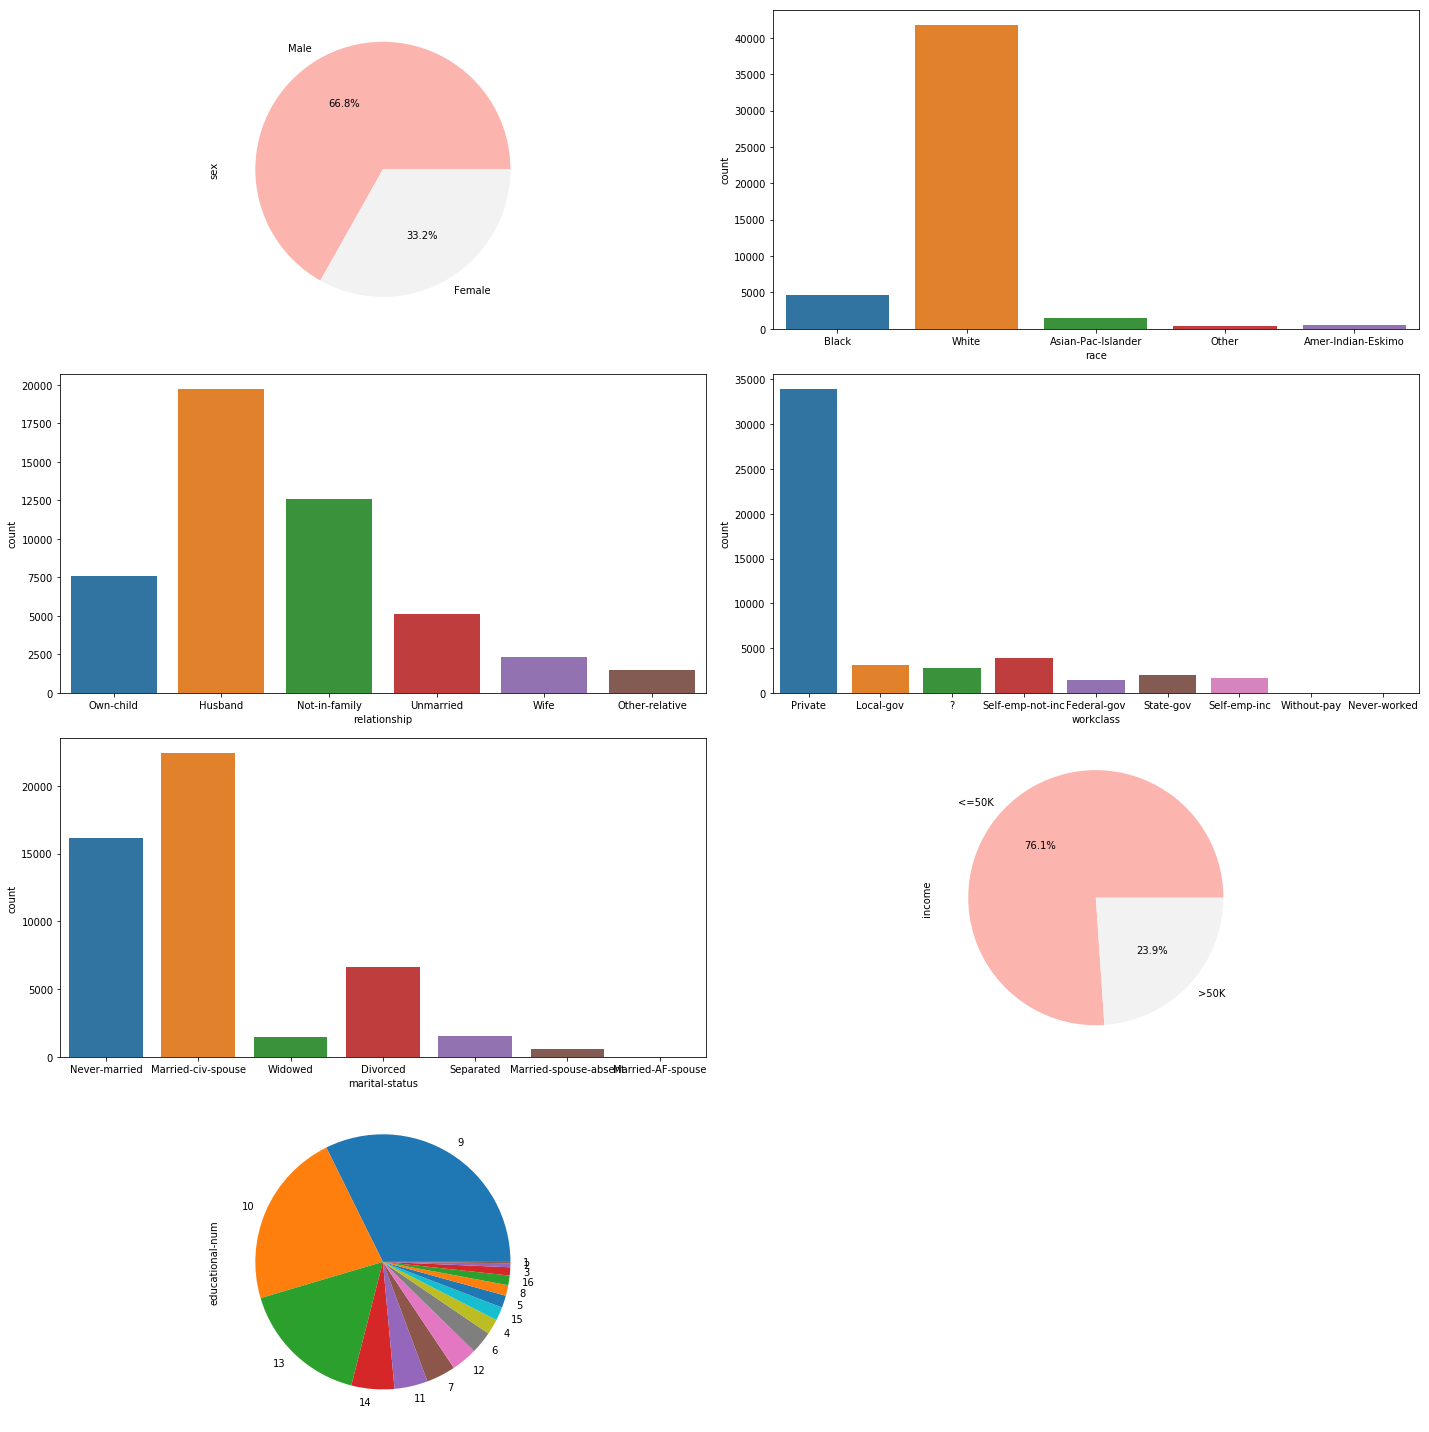

In [5]:
#Subplots for various countplot of our dataset
fig, ax = plt.subplots(4, 2, figsize=(20,20))
fig.delaxes(ax[3,1])

#sns.countplot(df['sex'],ax= ax[0,0]);
df['sex'].value_counts().plot.pie(cmap = 'Pastel1',ax = ax[0,0],autopct='%.1f%%');

sns.countplot(df['race'],ax = ax[0,1])

sns.countplot(df['relationship'],ax = ax[1,0])

sns.countplot(df['workclass'],ax = ax[1,1])

sns.countplot(df['marital-status'],ax = ax[2,0])

df['income'].value_counts().plot.pie(cmap = 'Pastel1',ax = ax[2,1],autopct='%.1f%%');

df['educational-num'].value_counts().plot.pie(ax = ax[3,0]);

plt.tight_layout()

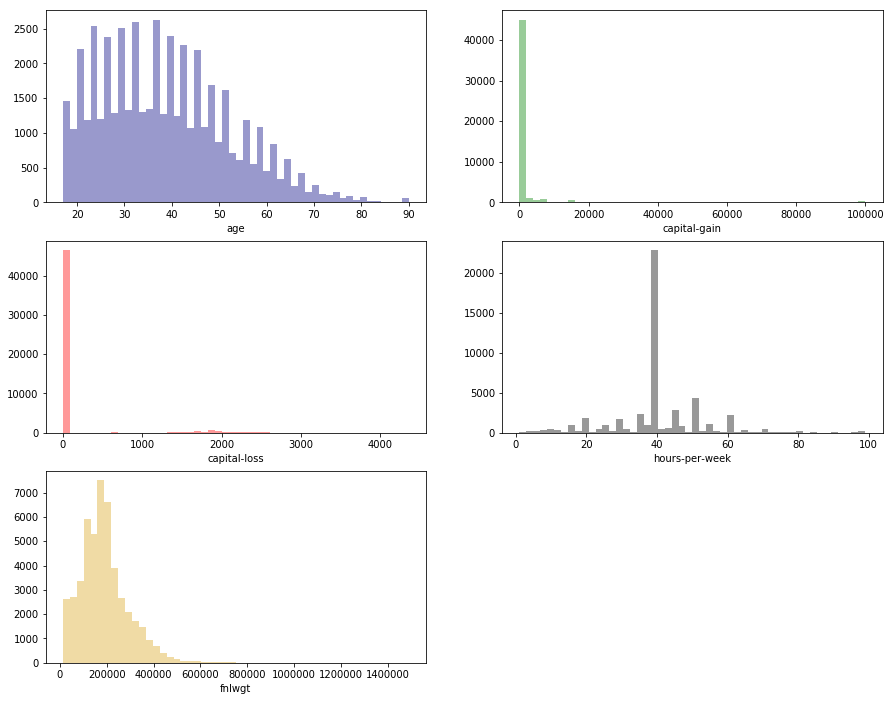

In [6]:
#Distribution plots of our dataset
fig, ax = plt.subplots(3, 2, figsize=(15,12))
fig.delaxes(ax[2,1])
sns.distplot(df['age'],kde = False,ax = ax[0,0],color='navy')
sns.distplot(df['capital-gain'],kde = False,ax = ax[0,1],color='green')
sns.distplot(df['capital-loss'],kde = False,ax = ax[1,0],color='red')
sns.distplot(df['hours-per-week'],kde = False,ax = ax[1,1],color='black')
sns.distplot(df['fnlwgt'],kde = False,ax = ax[2,0],color='goldenrod');

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


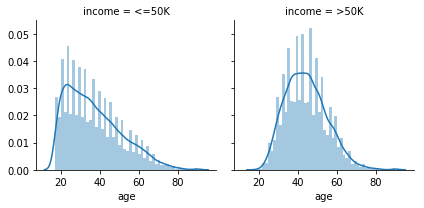

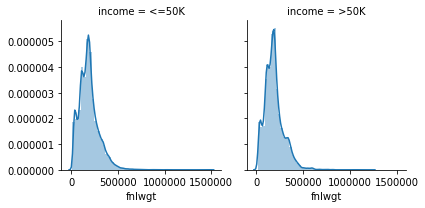

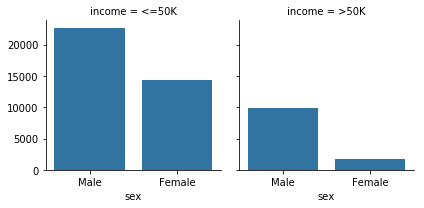

In [7]:
#Facet grids for distribution and countplot
g = sns.FacetGrid(df, col='income')
g = g.map(sns.distplot, "age")

g = sns.FacetGrid(df, col='income')
g = g.map(sns.distplot, "fnlwgt")

g = sns.FacetGrid(df, col='income')
g = g.map(sns.countplot, "sex")
plt.show()

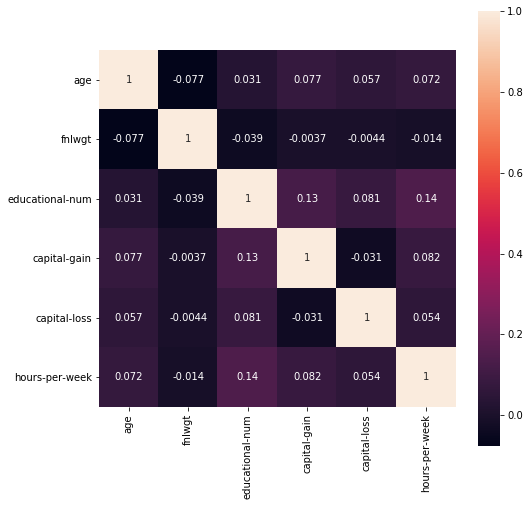

In [8]:
#Heatmap for numerical columns
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),annot = True,square = True);

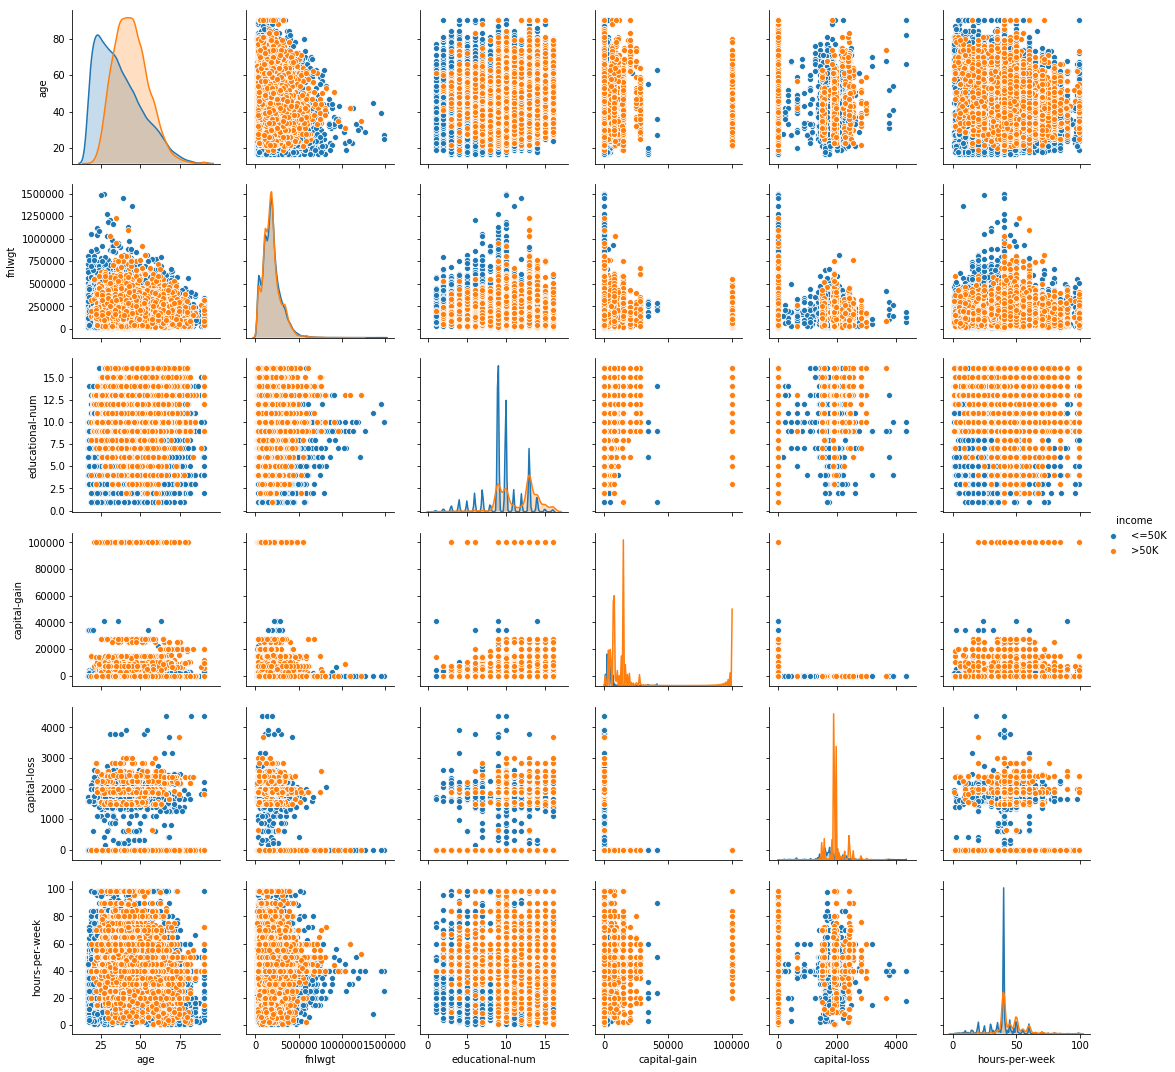

In [10]:
#Pairplot for dataframe
sns.pairplot(df, hue = "income");

## 2. Data Cleaning and Preprocessing: 

### 2.1. Dealing with null values:

In [11]:
df.isnull().values.any()

False

In [12]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [13]:
df = df.replace('?', np.NaN)

In [14]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
sex                   0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [15]:
for col in ['workclass', 'occupation', 'native-country']:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [16]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

### 2.2. Feature Engineering:

In [17]:
#Function to clean column
def sex(p):
    if p == 'Male':
        return 1
    else:
        return 0
df['sex'] = df['sex'].apply(sex)

In [18]:
#Function to clean marriage status
def status(p):
    if p == 'Married-civ-spouse':
        return 1
    elif p == 'Married-spouse-absent':
        return 1
    elif p == 'Married-AF-spouse':
        return 1
    else:
        return 0
df['marital-status'] = df['marital-status'].apply(status)

### 2.3. Deleting unncecessary attributes:

In [19]:
#Deleting the unnecessary attributes
df.drop(["workclass","education","occupation","relationship","race","native-country"], axis = 1, inplace = True)
df.head()

,age,fnlwgt,educational-num,marital-status,sex,capital-gain,capital-loss,hours-per-week,income
0,25,226802,7,0,1,0,0,40,<=50K
1,38,89814,9,1,1,0,0,50,<=50K
2,28,336951,12,1,1,0,0,40,>50K
3,44,160323,10,1,1,7688,0,40,>50K
4,18,103497,10,0,0,0,0,30,<=50K


### 2.4.Processing of data to apply machine learning:

In [20]:
#Assigning X and y values for machine learning
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [21]:
X

array([[    25, 226802,      7, ...,      0,      0,     40],
       [    38,  89814,      9, ...,      0,      0,     50],
       [    28, 336951,     12, ...,      0,      0,     40],
       ...,
       [    58, 151910,      9, ...,      0,      0,     40],
       [    22, 201490,      9, ...,      0,      0,     20],
       [    52, 287927,      9, ...,  15024,      0,     40]], dtype=int64)

In [22]:
y

array(['<=50K', '<=50K', '>50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

In [23]:
#Applying label Encoder to y to make <=50K salary as 0 and >50K as 1
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 1])

### 2.5. Outlier removal:

In [24]:
df_i = df.copy()

In [31]:
Q1 = df_i.quantile(0.25)
Q3 = df_i.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_i = df_i[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_i.shape

age                    18.0
fnlwgt             111393.5
educational-num         2.0
marital-status          1.0
sex                     1.0
capital-gain            0.0
capital-loss            0.0
hours-per-week          0.0
dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(17792, 9)

In [32]:
x = df_i.iloc[:,:-1].values
Y = df_i.iloc[:,-1].values

In [33]:
x

array([[    25, 226802,      7, ...,      0,      0,     40],
       [    28, 336951,     12, ...,      0,      0,     40],
       [    29, 227026,      9, ...,      0,      0,     40],
       ...,
       [    22, 310152,     10, ...,      0,      0,     40],
       [    40, 154374,      9, ...,      0,      0,     40],
       [    58, 151910,      9, ...,      0,      0,     40]], dtype=int64)

In [34]:
Y

array(['<=50K', '>50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype=object)

In [35]:
labelencoder_y = LabelEncoder()
Y = labelencoder_y.fit_transform(Y)
Y

array([0, 1, 0, ..., 0, 1, 0])

## 3. Logistic Regression:

### 3.1.Model training:

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [37]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(pn_jobs=-1)
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l1', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [38]:
y_proba = classifier.predict_proba(X_train)
y_proba

array([[0.55149064, 0.44850936],
       [0.71814012, 0.28185988],
       [0.99050778, 0.00949222],
       ...,
       [0.99127702, 0.00872298],
       [0.59021884, 0.40978116],
       [0.96504049, 0.03495951]])

In [39]:
y_predict_train = classifier.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 0, 0, 0])

In [40]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

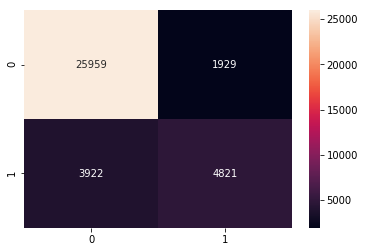

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

### 3.2.Model testing:

In [42]:
y_predict_test = classifier.predict(X_test)
y_predict_test

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

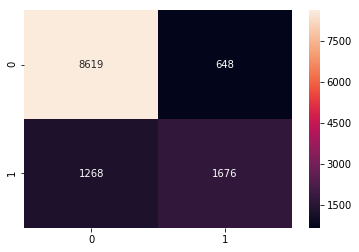

In [44]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      9267
           1       0.72      0.57      0.64      2944

   micro avg       0.84      0.84      0.84     12211
   macro avg       0.80      0.75      0.77     12211
weighted avg       0.84      0.84      0.84     12211



In [46]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_predict_test)
print('Logistic Regression with outliers:', acc * 100)
l['Logistic_reg'] = acc

Logistic Regression with outliers: 84.30922938334288


### 3.3.Model training on data with no outliers:

In [47]:
x_train, x_test, Y_train, Y_test = train_test_split(x,Y,test_size=0.25,random_state=1)

In [48]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression( n_jobs = -1)
classifier.fit(x_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:1300: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l1', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

In [49]:
Y_proba = classifier.predict_proba(x_train)
Y_proba

array([[0.63661353, 0.36338647],
       [0.98589351, 0.01410649],
       [0.96126634, 0.03873366],
       ...,
       [0.9441256 , 0.0558744 ],
       [0.44945357, 0.55054643],
       [0.2382108 , 0.7617892 ]])

In [50]:
Y_predict_train = classifier.predict(x_train)
Y_predict_train

array([0, 0, 0, ..., 0, 1, 1])

In [51]:
Y_train

array([0, 0, 0, ..., 0, 1, 0])

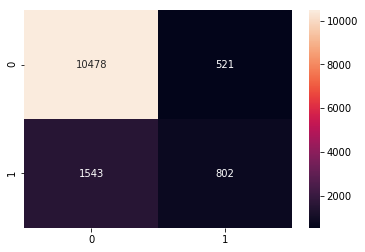

In [52]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(Y_train, Y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

### 3.3.Model testing on data with no outliers:

In [53]:
Y_predict_test = classifier.predict(x_test)
Y_predict_test

array([0, 0, 0, ..., 0, 0, 0])

In [54]:
Y_test

array([0, 0, 0, ..., 0, 1, 0])

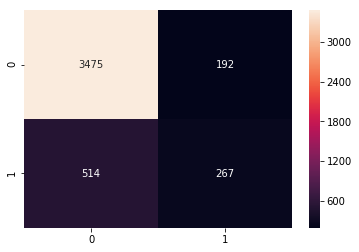

In [55]:
cm = confusion_matrix(Y_test, Y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [56]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_predict_test))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      3667
           1       0.58      0.34      0.43       781

   micro avg       0.84      0.84      0.84      4448
   macro avg       0.73      0.64      0.67      4448
weighted avg       0.82      0.84      0.82      4448



In [57]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, Y_predict_test)
print('Logistic Regression without outliers:', acc * 100)
l['Logistic_reg_no_out'] = acc

Logistic Regression without outliers: 84.12769784172663


## 4. KNN :

### 4.1.Model training:

In [58]:
k_range = np.arange(1, 36)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores.index(max(scores)), max(scores))

28 0.8032102202931782


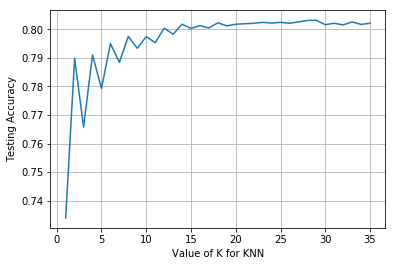

In [59]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 28, n_jobs = -1)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=28, p=2,
           weights='uniform')

In [61]:
y_proba1 = classifier.predict_proba(X_train)
y_proba1

array([[0.92857143, 0.07142857],
       [0.85714286, 0.14285714],
       [0.82142857, 0.17857143],
       ...,
       [0.78571429, 0.21428571],
       [0.71428571, 0.28571429],
       [0.89285714, 0.10714286]])

In [62]:
y_predict_train1 = classifier.predict(X_train)
y_predict_train1

array([0, 0, 0, ..., 0, 0, 0])

In [63]:
y_train

array([0, 0, 0, ..., 0, 1, 0])

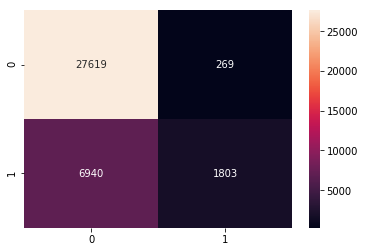

In [64]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train1)
sns.heatmap(cm, annot=True, fmt="d")

### 4.2.Model testing:

In [65]:
y_predict_test1 = classifier.predict(X_test)
y_predict_test1

array([0, 0, 0, ..., 0, 0, 0])

In [66]:
y_test

array([0, 0, 1, ..., 0, 0, 0])

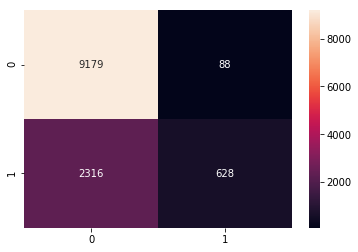

In [67]:
cm = confusion_matrix(y_test, y_predict_test1)
sns.heatmap(cm, annot=True, fmt="d")

In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test1))

              precision    recall  f1-score   support

           0       0.80      0.99      0.88      9267
           1       0.88      0.21      0.34      2944

   micro avg       0.80      0.80      0.80     12211
   macro avg       0.84      0.60      0.61     12211
weighted avg       0.82      0.80      0.75     12211



In [69]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_predict_test1)
print('Knn with outliers:',acc * 100)
l['knn'] = acc

Knn with outliers: 80.31283269183524


### 4.3.Model training on data with no outliers:

In [71]:
k_range = np.arange(1, 36)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, Y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(Y_test, y_pred))
print(scores.index(max(scores)), max(scores))

19 0.8244660921693518


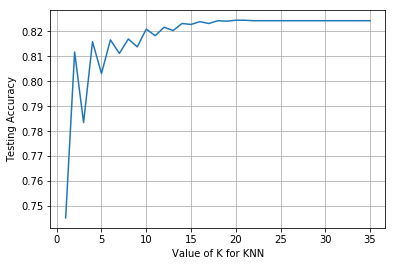

In [72]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)

In [73]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 19,n_jobs=1)
classifier.fit(x_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=19, p=2,
           weights='uniform')

In [74]:
y_proba2 = classifier.predict_proba(x_train)
y_proba2

array([[0.84210526, 0.15789474],
       [0.89473684, 0.10526316],
       [0.84210526, 0.15789474],
       ...,
       [0.84210526, 0.15789474],
       [0.73684211, 0.26315789],
       [0.89473684, 0.10526316]])

In [75]:
y_predict_train2 = classifier.predict(x_train)
y_predict_train2

array([0, 0, 0, ..., 0, 0, 0])

In [76]:
Y_train

array([1, 0, 0, ..., 0, 0, 1])

### 4.4.Model testing on data with no outliers:

In [78]:
y_predict_test2 = classifier.predict(x_test)
y_predict_test2

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
Y_test

array([0, 0, 0, ..., 0, 0, 1])

In [83]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, y_predict_test2)
print('Knn without outliers:',acc * 100)
l['knn_no_out'] = acc

Knn without outliers: 82.40914200074934


### Bar plot showing difference in acuuracy of models:

([0, 1, 2, 3], <a list of 4 Text xticklabel objects>)

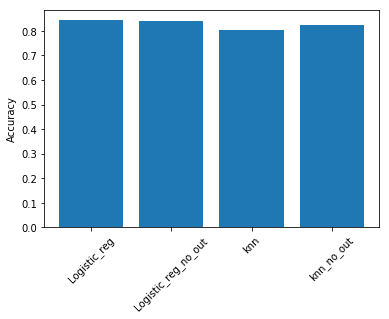

In [84]:
keys = l.keys()
values =l.values()

plt.bar(keys,values)
plt.ylabel('Accuracy')
plt.xticks(rotation=45)


